<a href="https://colab.research.google.com/github/Projas-14/ADA-informes/blob/main/Informe_3_MaxSubArray_Paul_Rojas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Informe 3

Nombre: Paul Rojas Ojeda Rut: 19.263.734-1

## En la descripción del problema.

Dado un arreglo de largo $n = [a_1, a_2, ... ,a_n]$, se busca encontrar un sub-arreglo que contenga la suma de elementos mas grandes de todos los posibles sub-arreglos, tal que subarray = [a'_1, a'_2 ,..., a'_n]$.

una de las posibles soluciones es:

1. través del algoritmo de **fuerza bruta** este consiste en encontrar todos los pares posibles y ver cuales nos dan el mejor resultados.

Esto implica iterar cada uno de los indices con su siguiente sub indice, de modo que al momento de encontrar la suma mayor ese sera el sub-arreglo maximo de todos.

ejemplo n=[-3,1,-2,1,-1,3]

donde evaluamos -3+1 =-2 posible solución -> 1-2+1=0 nueva posible solución. hasta llegar a nuestra solución que seria -> 1-1+3 = 3 entonces de esta forma encontramos el sub-arreglo con la suma mayor en su elementos subArrayMAx = [3].

no obstante su solución no es la mas optima, su complejidad es de $O(n ^2)$.






# Explicacion de función MaxSubArrayMid.

Otra forma para encontrar el max-sub-arreglo es con el metodo **Divide y vencerás**, este funciona de la siguiente forma.

Dividir  la mitad de nuestro caso donde tendremos 2 opciones
 n=[-3,1,-2,1,-1,3]  .izquierdo =[-3,1,-2]  y derecho=[1,-1,3].

Con la finalidad de ir dividiendo extremos aun mas.

izq_1 = [-3] y izq_2 = [1,-2] $-->$ izq_2_1 = [1] - izq_2_2 = [-2]


der_1 = [1] y der_2 = [-1,3] $-->$ der_2_1 = [-1] - izq_2_2 = [3]

retornando el valor maximo de cada uno y sumando en caso.

Dando como resultado max_izq = [1] y max_der = [3]

en este caso se cumple que el lado derecho es el que tiene el sub-arreglo máximo.

No obstante  puede pasar que el sub-arreglo este en la *mitad donde cruza entre los dos sub-arreglos*.

Entonces tendríamos que darnos darnos ese caso (cruzarnos a la mitad) y obtendríamos 3 sub-problemas de modo que para encontrar el **subarreglo maximo** tendriamos que combinarlos para encontrar el mayor entre ellos.


entonces nuestros casos son:

Caso 1 izquierdo =[1]

Caso 2 derecho=[3]

Caso 3 mitad=[-3,1,-2,1,-1,3]



En el caso 1 y 2 obtener su resultado de forma recursiva atraves de la implementación del **divide y venceras**, como anteriormente fue mencionado y obtener su máximo valor de su sub-arreglo máximo en cada uno de los casos.

Ahora para el caso 3  que lo llamaremos **MaxSubArrayMid**, esta funcion encuentra el **sub-arreglo maximo** de un arreglo que contenga el elemento medio.

Este algoritmo recorre linealmente el arreglo, por el lado izquierdo para encontrar el maximo valor de los sub arreglo y mismo caso en el lado derecho retornando la una suma entre el lado derecho y izquierdo

Obteniendo:

Caso 3 medio = izquierdo=[1,-2] + derecho=[1,-1,3] = 5

Ahora se compara los 3 casos y obtenemos que el sub-arreglo maximo en este caso es el caso 3.

Dandonos a entender que tendremos 2 caso recursivo (caso 1 y 2) y un caso lineal (caso 3).

El este caso tendremos complejidad es de O(n log(n)), esto es tomando en cuenta 2 casos recursivo y 1 lineal.

## Implementación MaxSubArrayMid

In [33]:
Contador = 0

import random
from termcolor import colored
import copy

def MaxSubArrayMid(lista, mitad, verbose=False):
  global Contador

  ### variables para el lado izquierdo
  max_izq = float("-inf") #el numero menor 
  suma_posicion_temporal = 0
  posicion_inicio = mitad
  low = 0
  high = len(lista)


  for i in range(mitad - 1, low -1, -1): # arreglo por la izquierda
    

    
    suma_posicion_temporal += lista[i]

    if suma_posicion_temporal > max_izq:
      Contador +=1
      max_izq = suma_posicion_temporal
      low = i

  if verbose == True: 
    if(max_izq != float("-inf")):
        print(" Suma izquierda: ", max_izq)
      
  

  # variables para el lado derecho
  max_der = float("-inf") #el numero menor 
  suma_posicion_temporal = 0
  posicion_final = mitad+1


  for j in range(mitad, len(lista)):



    suma_posicion_temporal += lista[j]



    if suma_posicion_temporal > max_der:

      Contador +=1
      max_der = suma_posicion_temporal
      high=j

  if verbose == True: 
    if(max_izq != float("-inf")):
        print(" Suma derecha: ", max_der)
      


  return low,high,max_izq + max_der



  
   





### ejemplo 


In [34]:
arg = [-3,1,-2,1,-1,3]
mitad = (len(arg))//2

print("Entrada: ",arg)
indice_low, indice_high, maximo =MaxSubArrayMid(arg,mitad)

print("salida ", arg[indice_low:indice_high+1])

print("Valor maximo: ", maximo)

print("Indice low: ",indice_low)

print("Indice high: ",indice_high)

Entrada:  [-3, 1, -2, 1, -1, 3]
salida  [1, -2, 1, -1, 3]
Valor maximo:  2
Indice low:  1
Indice high:  5


### Explicacion de la funcion MaxSubArrayMid

Tendremos un arreglo *lista* de largo n, donde su mitad = n/2, su indice  low sera = 0 y high = len(lista).

Donde se recorre la mitad izquierda de forma la siguiente forma:
* Desde el lista[mitad] reduciendo su indice hasta llegar a indice low.
* En cada comparacion pregunta si la suma es mayor a la anterior.
hasta encontrar el maximo valor de ese lado
* ahora recorre de lista[mitad+1] hasta llegar a indice high.
* En cada comparacion pregunta si la suma es mayor a la anterior

Entregando un resultado de cada una y sumando el maximo_izquierdo con el maximo_derecho, retornando el valor correspondiente.


## MaxSubArrayMid verbose=True

In [36]:
arg = [2,-3,4,-5,6,-7]
low = 0
high = len(arg)
mitad = len(arg)//2

print("Entrada: ",arg)
indice_low, indice_high, maximo =MaxSubArrayMid(arg,mitad,True)

print("salida ", arg[indice_low:indice_high+1])

print("Valor maximo: ", maximo)

print("Indice low: ",indice_low)

print("Indice high: ",indice_high)

Entrada:  [2, -3, 4, -5, 6, -7]
 Suma izquierda:  4
 Suma derecha:  1
salida  [4, -5, 6]
Valor maximo:  5
Indice low:  2
Indice high:  4


## implementacion de MaxArray

In [64]:
import math
from termcolor import colored

def MaxSubArray(lista,l,h,verbose=False):
  largo = len(lista)

  #caso base n=1
  if(largo == 1):
    return l,l,lista[0]

  mitad = largo//2

  #arreglo Izquierdo 
  arreglo_izq = lista[:mitad]
  #arreglo derecho 
  arreglo_der = lista[mitad:]

  #Verbose == True
  if (verbose == True):
        print("SubArreglo Izquierdo: ", colored(f"{str(arreglo_izq)}","blue"))
        print("SubArreglo Derecho: ", colored(f"{str(arreglo_der)}","blue"), "\n")


  # obtener la MaxSubArray (izquiedo) y su indice incio y final.
  low_izq, high_izq, MaxS_izq = MaxSubArray(arreglo_izq, l, mitad -1, verbose)


  # obtener la MaxSubArray (derecho) y su indice incio y final.
  low_der, high_der, MaxS_der = MaxSubArray(arreglo_der, mitad, h, verbose)

  # obtener la MaxSubArray (derecho) y su indice incio y final.
  low_mitad, high_mitad, MaxS_mitad = MaxSubArrayMid(lista, mitad, verbose)
        

  if(MaxS_izq > MaxS_der and MaxS_izq > MaxS_mitad):
    if (verbose == True):
        print("Suma Maxima SubArreglo actual es: ", MaxS_izq,"\n")
    return low_izq, high_izq, MaxS_izq
  elif( MaxS_der >MaxS_izq and  MaxS_der and MaxS_mitad):
    if (verbose == True):
        print("Suma Maxima SubArreglo actual es: ",MaxS_der,"\n" )
    return low_der, high_der, MaxS_der
  else:
    if (verbose == True):
        print("Suma Maxima SubArreglo actual es: ",MaxS_mitad, "\n")
    return low_mitad, high_mitad, MaxS_mitad


  

In [67]:
arg = [90,2,-100,12,1,15]
low = 0
high = len(arg)


print("Entrada: ",arg)
indice_low, indice_high, maximo =MaxSubArray(arg,low,high)

if(indice_low-1 == indice_high):
  print("salida subarreglo Maximo: ", [arg[indice_low-1]])
else:
  print("salida subarreglo Maximo: ", arg[indice_low:indice_high+1])

print("Valor maximo: ", maximo)

print("Indice low: ",indice_low)

print("Indice high: ",indice_high)


Entrada:  [90, 2, -100, 12, 1, 15]
salida subarreglo Maximo:  [90, 2]
Valor maximo:  92
Indice low:  0
Indice high:  1


## Ejemplo SubArrayMax y SubarrayMid
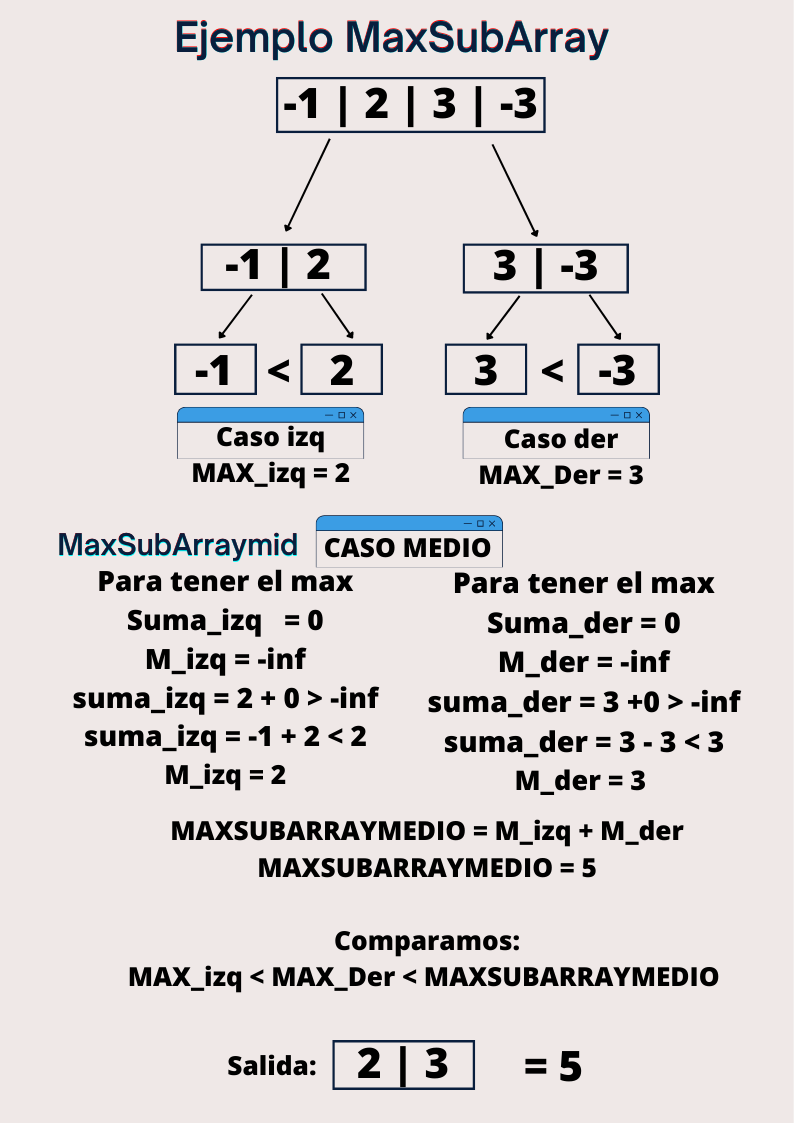

### SubArrayMax Verbose == True

In [66]:
arg = [84, -20, 89, -59,1]
low = 0
high = len(arg)


print("Entrada: ",arg)
indice_low, indice_high, maximo =MaxSubArray(arg,low,high,True)

if(indice_low-1 == indice_high):
  print("salida subarreglo Maximo: ", [arg[indice_low-1]])
else:
  print("salida subarreglo Maximo: ", arg[indice_low:indice_high+1])

print("Valor maximo: ", maximo)

print("Indice low: ",indice_low)

print("Indice high: ",indice_high)


Entrada:  [84, -20, 89, -59, 1]
SubArreglo Izquierdo:  [84, -20]
SubArreglo Derecho:  [89, -59, 1] 

SubArreglo Izquierdo:  [84]
SubArreglo Derecho:  [-20] 

 Suma izquierda:  84
 Suma derecha:  -20
Suma Maxima SubArreglo actual es:  84 

SubArreglo Izquierdo:  [89]
SubArreglo Derecho:  [-59, 1] 

SubArreglo Izquierdo:  [-59]
SubArreglo Derecho:  [1] 

 Suma izquierda:  -59
 Suma derecha:  1
Suma Maxima SubArreglo actual es:  1 

 Suma izquierda:  89
 Suma derecha:  -58
Suma Maxima SubArreglo actual es:  89 

 Suma izquierda:  64
 Suma derecha:  89
Suma Maxima SubArreglo actual es:  89 

salida subarreglo Maximo:  [89]
Valor maximo:  89
Indice low:  2
Indice high:  2


## ¿La función MaxSubArrayMid es correcta?

Para obtener funcion correspondiente a **MaxSubArrayMid** usamos un *arbol de recurrencia* tal que nos quedara:



Ahora con la funcion $T(n) = t(n/2) + O(1)$ realizamos el metodo de sustitucion con O(n) es la cota superior asintótica para $T(n)$.

Ahora demos probar que $T(n) \leq dn $, para algún valor de $d>0$.

Para ello, asumimos que esto es cierto(inducción) y *sustituimos en la recursión*, los valores de $T(n) por dn$

$T(n) \leq 2\ast d(n/2) + C $ 

Ahora desarrollamos:

 $T(n) \leq d(n/2) + C \leq dn$

 $ d(n/2) + C \leq dn $

 $ C \leq d(n/2) $ como se cumple tenemos que la funcion si es correcta.
 





# algoritmo MaxSubArray es correcto utilizando inducción.



### **Teorema 1 (Correctitud de la función MaxSubArray)**

El algoritmo **MaxSubArray** genera un arreglo: $[a_1',a_2',...,a_n']$ donde este tendra el sub-arreglo con el maximo valor de un arreglo de largo $n$, donde se esta tomando en cuenta 3 casos.
* caso izquierdo = [n/2:]
* Caso medio = [n]
* Caso derecho = [:n/2]

y de estos 3 casos se genera el sub-arreglo maximo.




### Prueba de Correctitud (MergeSort)

Nuestra hipótesis $P(n)$ es que MaxSubArray, retorna un sub-arreglo de los elementos donde se encuentra el maximo valor. Ahora tenemos que para un arreglo de largo $n$ en $p(n)$

* para el *caso base* tomaremos $n=1$. 

Entonces para nuestro metodo con $p(1)$ retorna un unico valor, entonces se cumple que para $p(1)$ es cierto.

* ahora para el paso inductivo, debemos probar que si $p(n+1)$ es cierto, entonces $p(n)$ tambien lo será.

Para un arreglo n elementos, el algoritmo divide el arreglo en dos sub-problemas de tamaños donde el lado $izquierdo=[n+1/2]$ y el $derecho=[n+1/2]$ como nuestro tamaño es menor a $n+1>(n+1)/2$.

Con el tamaño de estos sub-arreglo, tenemos que con el paso inductivo que el lado izquierdo tiene su tamaño maximo y el lado derecho tambien tiene su tamaño maximo.

Ahora tenemos que analizar el caso $medio =[n+1]$ tenemos la suma de ambos lados y este caso, con el teorema 1 tendremos que $maxSubArray$ obtendremos el maximo de un sub-arreglo, por lo tanto el algoritmo MaxSubArray es correcto.
 


# Analice y tiempo de ejecución del algoritmo MaxSubArray.

El algoritmo funciona de la siguiente manera:

*   divide la matriz en dos sub-arreglos iguales. 
*   Calcula Recursivamente la suma maxima de sub-arreglos para el lado izquierdo y del mismo modo para el lado derecho.
*   Encontrando la suma maxima del sub-arreglo que cruza el elemento del medio.
* Devuelve el maximo de las 3 sumas.

Con esto probaremos su tiempo de ejecuccion usaremos *el árbol de recursion:*.

* Para comenzar el tamaño del arreglo $n$ realiza dos llamadas recursiva de tamaño $(n/2)$



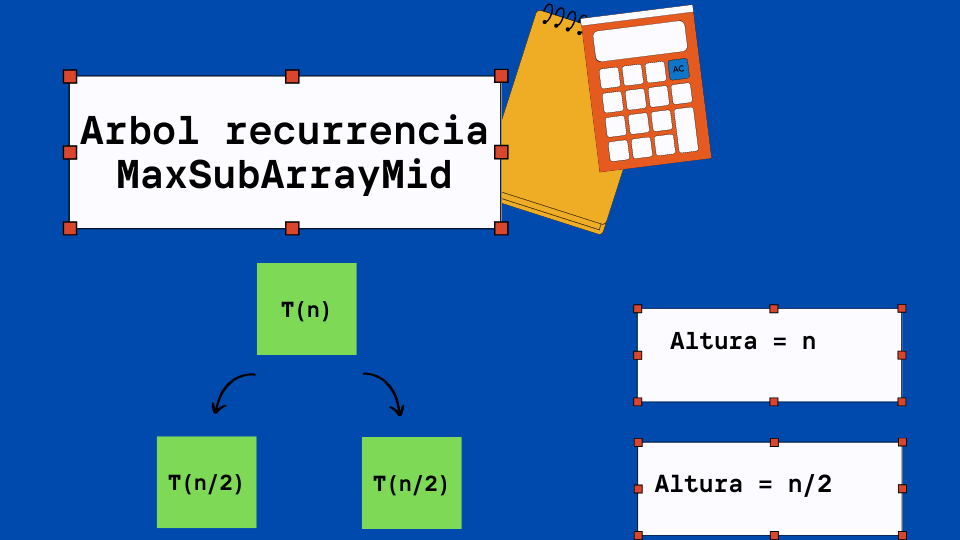

Primero sumamos los costos de cada nivel para obtener un costo por nivel.
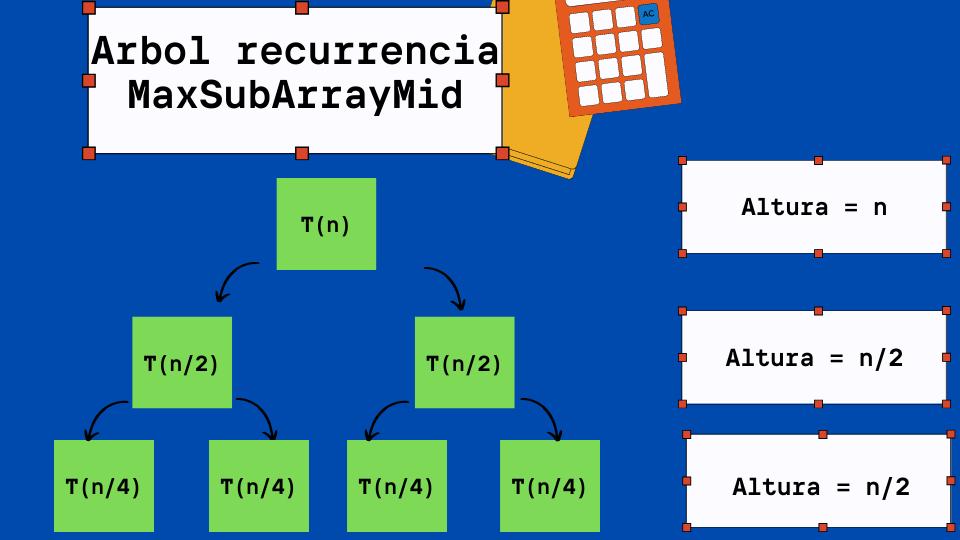

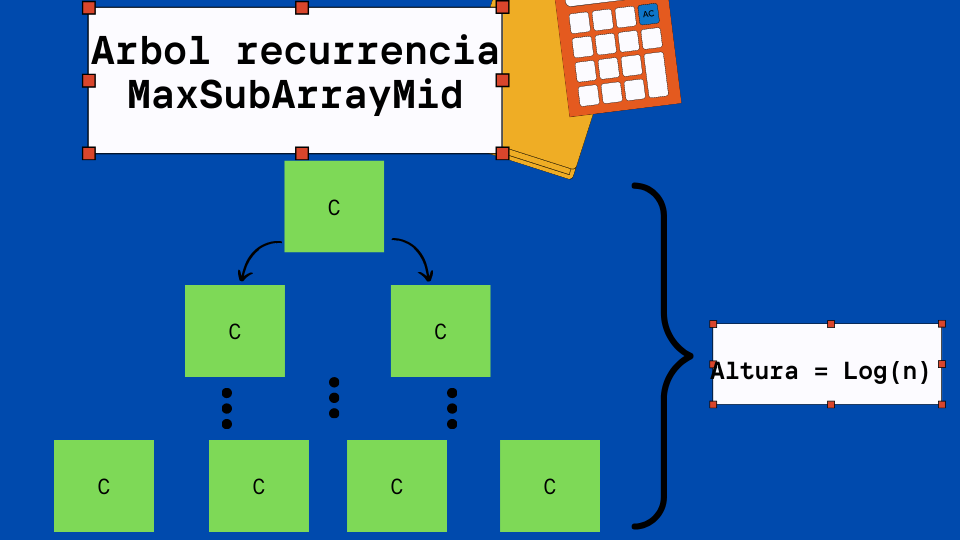

Entonces sumamos los costos por nivel y el costo de caso medio obtenemos $n*log(n)$ dandonos una complejidad temporal de $O(n*log(n))$. 

Dandonos un $T(n) = 2T(n/2) + o(n) = O(n*log(n))$

Donde queda reemplazando tanto su cota superior $O(n*log(n))$ en el peor caso como su cota inferior $ \Omega (n*log(n)) $, entonces para todos los casos el algoritmo sera $\ominus(n*log(n))$.

# experimentos:

Comparar implementacion realizada con un MaxSubArray implementado con el Algoritmo de Kadane.

Para ello se implementa el algoritmo de kadane.

In [69]:
def kadane(lista):
  max_sum = 0
  max_current = 0

  for i in range(len(lista)):
    max_current += lista[i]
    if max_current < 0:
      max_current = 0
    if max_sum < max_current:
      max_sum = max_current 
  

  return max_sum,i +1 

a = [2, 3, 4,-4, -5, -7]

print(kadane(a))

(9, 6)


# Implementacion de algortimo de fuerza bruta

In [70]:
def FuerzaBruta(lista):
  suma = 0
  maximo = 0
  for i in range(len(lista)):
    actual = 0
    for j in range(i+1,len(lista)):
      actual += lista[j]
      if actual > maximo:
        maximo = actual

  return maximo

a =  [2, 3, 4,-4, -5, -7]

print(FuerzaBruta(a))


7


### Comparación de tiempo de ejecucion de Algoritmo MaxArray vs Kadane vs Fuerza Bruta

En el siguiente gráfico se compara el tiempo de ejecución de los algoritmos axArray vs Kadane vs Fuerza Bruta,  para arreglos generados con nuemeros aleatorios entre $[-1000 , 1000[$ de tamaños entre 5 a 499 .

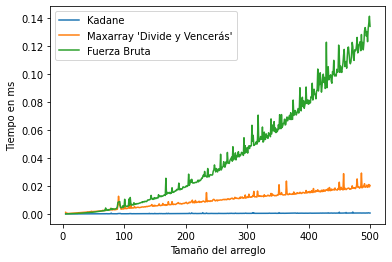

In [75]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random
import copy


x=[]; 
y=[]
y1=[]
y2=[]
for n in range(5,501):

  a = random.sample(range(-1000, 1000), n)
  verbose = False
  #la función repeat está ejecutando 20 veces insertion_Sort con el arreglo a y retorna el mejor tiepo obtenido.
  t1 = repeat(setup="from __main__ import kadane", stmt=f"kadane({a})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import MaxSubArray", stmt=f"MaxSubArray({a},{0},{n-1})", repeat=1, number=10)
  t3 = repeat(setup="from __main__ import FuerzaBruta", stmt=f"FuerzaBruta({a})", repeat=1, number=10)
  x.append(n)
  y.append(t1)
  y1.append(t2)
  y2.append(t3)


plt.plot(x, y)
plt.plot(x, y1)
plt.plot(x, y2)
plt.legend(["Kadane", "Maxarray 'Divide y Vencerás'", "Fuerza Bruta"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

## Analisis de experimento:



Se puede apreciar en el gráfico que ante los mismos arreglos generados aleatoriamente:
* el algoritmo *"Fuerza Bruta"*, incrementa de forma mas elevada su tiempo en ejecución, esto es debido que su complejidad es de $O(n^2)$, siendo muy notable la diferencia a comparacion de los otros dos algoritmo.

* el algoritmo *"Divide y venceras"*, incrementa de forma exponecial, esto es debido que su complejidad es de $O(nlog(n))$, encontrandose entre medio de ambos algoritmo siendo mejor su tiempo de ejecucion ante *Fuerza bruta*, pero inferior ante el *Kadane*.

*  el algoritmo *"Kadane"*, incrementa de forma lineal, esto es debido que su complejidad es de $O(n))$, logrando el mejor tiempo de ejecución dando a entender que este es el mejor algoritmo relacionado con la busqueda de el Sub-arreglo maximo, cabe destacar que es el algoritmo mas simple de implementar.

Tambien se observa un pequeños Peaks en el tiempo de ejecucion que se hace mas notorio en el fuerza bruta, esto puede ser por recurso del procesador o alguna irregularidad, aunque cabe destacar que el comportamiento es el esperado para cada algoritmo.